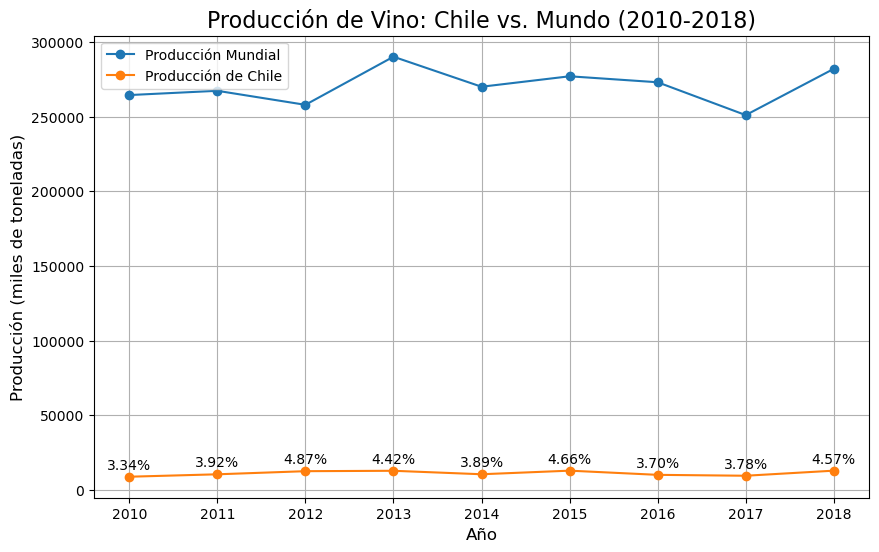

In [ ]:
# codigo en 1 click, desafio clase 08. Con varios extractos de la clase.
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt

url = "https://en.wikipedia.org/wiki/Winemaking"
headers = {"User-Agent": "imt2200-class-notebook-Benjamin_Pardo-desafio"}
page = requests.get(url, headers=headers, timeout=10)
html = page.text[:500]   # primeras 500 letras de la página

soup = bs(page.text)
tables_w = soup.find_all('table')

df_wine = pd.DataFrame(columns = ['country','2010','2011','2012','2013','2014','2015','2016','2017','2018'])

for row in tables_w[1].find_all('tr')[1::]:
    cols = row.find_all("th")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        country = cols[0]
        año_1 = cols[1]
        año_2 = cols[2]
        año_3 = cols[3]
        año_4 = cols[4]
        año_5 = cols[5]
        año_6 = cols[6]
        año_7 = cols[7]
        año_8 = cols[8]
        año_9 = cols[9]
        new_row = pd.DataFrame({'country': country, '2010': año_1, '2011': año_2,'2012':año_3,'2013':año_4,'2014':año_5,'2015':año_6,'2016':año_7,'2017':año_8,'2018':año_9}, index=['country'])
        df_wine = pd.concat([df_wine, new_row], ignore_index=True)

for row in tables_w[1].find_all('tr')[1::]:
    cols = row.find_all("td")
    if len(cols) > 0:
        #print(cols)
        cols = [col.text.strip() for col in cols]
        #print(cols)
        world = cols[0]
        año_1 = cols[1]
        año_2 = cols[2]
        año_3 = cols[3]
        año_4 = cols[4]
        año_5 = cols[5]
        año_6 = cols[6]
        año_7 = cols[7]
        año_8 = cols[8]
        año_9 = cols[9]
        new_row = pd.DataFrame({'country': world, '2010': año_1, '2011': año_2,'2012':año_3,'2013':año_4,'2014':año_5,'2015':año_6,'2016':año_7,'2017':año_8,'2018':año_9}, index=['country'])
        df_wine = pd.concat([df_wine, new_row], ignore_index=True)

df_comparacion = df_wine[df_wine['country'].isin(['World', 'Chile'])].set_index('country')


years = [str(year) for year in range(2010, 2019)]
for col in years:
    # Reemplaza la coma por un string vacío y convierte a entero
    df_comparacion[col] = df_comparacion[col].str.replace(',', '', regex=False).astype(int)
produccion_chile = df_comparacion.loc['Chile', years]
produccion_mundo = df_comparacion.loc['World', years]

porcentajes_chile = (produccion_chile.values / produccion_mundo.values) * 100

plt.figure(figsize=(10, 6))
plt.plot(years, produccion_mundo, marker='o', label='Producción Mundial')
plt.plot(years, produccion_chile, marker='o', label='Producción de Chile')
plt.title('Producción de Vino: Chile vs. Mundo (2010-2018)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción (miles de toneladas)', fontsize=12)
plt.legend()
plt.grid(True)

for i, valor_chile in enumerate(produccion_chile.values):
    porcentaje = porcentajes_chile[i]
    plt.text(i, valor_chile + 5000,f'{porcentaje:.2f}%',ha='center',fontsize=10)

**En general el aporte de Chile a la produccion mundial de vino durante 2010 a 2018 no supero el 5 %, es decir, muy poco**
